In [1]:
import numpy as np 
from imnfs.operations import compute_similarity, entropy_list, cross_entropy_list,\
                compute_weight, compute_normalized_scores
from imnfs.model import NFSet, RNF

# Load data

In [2]:
def read_data(path: str) -> NFSet:
    """
    Load a Neutrosophic Fuzzy Set (NFSet) from a text file.

    File format:
        Line 1: two integers n m  (number of rows, number of columns)
        Next n lines: flattened values (Mu, T, I, F) for each element.

    Example:
        2 3
        0.8 0.6 0.3 0.2  0.7 0.5 0.4 0.1
        0.9 0.7 0.2 0.3  0.6 0.4 0.5 0.2
    """
    with open(path) as fm:
        content = fm.readlines()
        n = [x.strip() for x in content]
    s = [int(k) for k in n[0].split()]
    out = []
    for j in range(1,s[0]+1):
        t = [float(k) for k in n[j].split()]
        out.append(np.resize(t,(s[1],4)).tolist())

    return NFSet(out)


In [3]:
nfset = read_data("data/original.txt")

In [4]:
cost = []
rnf = RNF(nfset, cost)
print(rnf.data)

[[[0.4  0.7  0.4  0.3 ]
  [0.3  0.27 0.4  0.7 ]
  [0.7  0.5  0.1  0.2 ]
  [0.6  0.5  0.9  0.4 ]
  [0.2  0.2  0.3  0.8 ]]

 [[0.6  0.5  0.8  0.2 ]
  [0.25 0.15 0.36 0.78]
  [0.8  0.9  0.   0.2 ]
  [0.7  0.6  0.96 0.45]
  [0.3  0.3  0.5  0.75]]

 [[0.3  0.9  0.1  0.1 ]
  [0.6  0.3  0.6  0.9 ]
  [0.65 0.25 0.4  0.5 ]
  [0.76 0.72 0.85 0.3 ]
  [0.35 0.3  0.45 0.87]]

 [[0.5  0.8  0.6  0.3 ]
  [0.1  0.1  0.8  0.2 ]
  [0.84 1.   0.5  0.  ]
  [0.65 0.57 0.8  0.35]
  [0.1  0.1  0.8  0.6 ]]

 [[0.7  0.65 0.2  0.8 ]
  [0.2  0.2  0.45 0.65]
  [0.5  0.7  0.4  0.6 ]
  [0.5  0.4  0.7  0.6 ]
  [0.8  0.7  0.2  0.3 ]]]


In [5]:
for i in range(9):
    print(np.array(entropy_list(rnf.data, i)))

[0.78870882 0.69901446 0.72959065 0.62976101 0.82821935]
[0.607 0.532 0.55  0.479 0.645]
[0.68173625 0.60748479 0.62518711 0.55528432 0.71356749]
[0.52515094 0.45371493 0.47158131 0.40423878 0.56856538]
[0.49073356 0.42006455 0.43797347 0.3714053  0.53685964]
[0.42794469 0.35055066 0.36927863 0.29501779 0.48165465]
[0.80639212 0.72162161 0.73995576 0.65859088 0.83051186]
[0.6790253  0.60722672 0.62466779 0.55747922 0.71054108]
[0.52003583 0.45093598 0.46854316 0.40371014 0.56284661]


In [6]:
for i in range(9):
    print(np.array(cross_entropy_list(rnf.data, i)))

[0.12324884 0.18829548 0.16846876 0.17695318 0.0930928 ]
[0.2915 0.3685 0.3405 0.334  0.25  ]
[0.22936715 0.29912752 0.27395359 0.26992296 0.19458972]
[0.36518969 0.44434435 0.41524225 0.40647125 0.31829785]
[0.39482079 0.47616232 0.44613207 0.43621005 0.34505059]
[0.43762672 0.53452305 0.49882504 0.48574808 0.37862387]
[0.11263398 0.18421119 0.15906209 0.15861623 0.08516878]
[0.23426188 0.30150189 0.27717041 0.27313153 0.20003316]
[0.37309458 0.44915817 0.42113227 0.41259932 0.32720945]


# Weight

In [7]:
for i in range(9):
    print(np.array(compute_weight(rnf,i)))
    # print(sum(compute_weight(rnf,i)))

[0.16124239 0.23582482 0.2115315  0.26373697 0.12766433]
[0.18149277 0.22179504 0.2095983  0.22670025 0.16041363]
[0.17758885 0.22428982 0.21038567 0.23174706 0.15598861]
[0.18559085 0.21886104 0.20848423 0.22142452 0.16563936]
[0.18674321 0.21814166 0.20823961 0.21994012 0.16693541]
[0.18660148 0.21881246 0.20875387 0.2200614  0.16577079]
[0.15764373 0.23812664 0.21574282 0.2573974  0.13108941]
[0.17869592 0.22344374 0.20999977 0.2303237  0.15753688]
[0.18637448 0.21808948 0.20811967 0.22041999 0.16699639]


# Ranking

In [8]:
visual = []
for i in range(9):
    print(np.array(compute_normalized_scores(rnf,i)))
    visual.append(compute_normalized_scores(rnf,i))

[0.58354992 0.36976687 0.67036748 0.49684783 0.38781846]
[0.61279995 0.33006794 0.70797428 0.49004375 0.36918269]
[0.59416092 0.35707803 0.68192731 0.49238569 0.3865674 ]
[0.62947351 0.30697158 0.73094308 0.4875244  0.35597431]
[0.64080527 0.29126645 0.74568736 0.48607146 0.3462968 ]
[0.70007878 0.20790933 0.81414416 0.47971132 0.29171556]
[0.58945192 0.36175821 0.67839486 0.49588065 0.38005354]
[0.59040104 0.36296674 0.67636354 0.49252613 0.3915392 ]
[0.62488568 0.31385719 0.72538429 0.48780153 0.36130966]


# Visualize

C:\Users\AlexNhat\AppData\Local\Temp\ipykernel_28644\3619931948.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xaxis,[visual[i][0] for i in range(9)],
C:\Users\AlexNhat\AppData\Local\Temp\ipykernel_28644\3619931948.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(xaxis,[visual[i][0] for i in range(9)],
C:\Users\AlexNhat\AppData\Local\Temp\ipykernel_28644\3619931948.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xaxis,[visual[i][1] for i in range(9)],
C:\Users\AlexNhat\AppData\Local\Temp\ipykernel_28644\3619931948.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt s

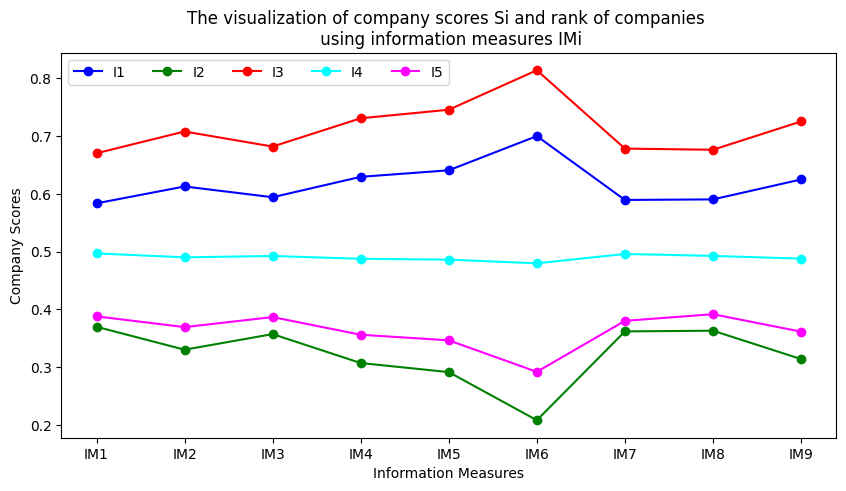

In [ ]:
import matplotlib.pyplot as plt
xaxis = [1,2,3,4,5,6,7,8,9]
plt.plot(xaxis,[visual[i][0] for i in range(9)],
        'go-', color='blue', label='I1', marker='o')
plt.plot(xaxis,[visual[i][1] for i in range(9)],
        'go-', color='green', label='I2', marker='o')
plt.plot(xaxis,[visual[i][2] for i in range(9)],
        'go-', color='red', label='I3', marker='o')
plt.plot(xaxis,[visual[i][3] for i in range(9)],
        'go-', color='cyan', label='I4', marker='o')
plt.plot(xaxis,[visual[i][4] for i in range(9)],
        'go-', color='magenta', label='I5', marker='o')
plt.xticks(xaxis,["IM1","IM2","IM3","IM4","IM5","IM6","IM7","IM8","IM9"])
plt.xlabel("Information Measures")
plt.ylabel("Company Scores")
plt.title("The visualization of company scores Si and rank of companies \n using information measures IMi")
figure = plt.gcf()
figure.set_size_inches(10,5)
plt.legend(loc='upper left', ncol=5)
plt.savefig('original.eps', format='eps')
plt.show()